# Timeline Analysis  Covid-19 (Advanced #8)
# Create a storyboard showing spread of Covid-19 cases in your country or any region (Asia, Europe, BRICS etc)
# Name - Pranit Maldikar
# Grip Feb-2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [2]:
covid_data = pd.read_csv(r'C:\Users\prani\Downloads\owid-covid-data.csv')
covid_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
covid_data=covid_data.replace(np.nan, 0)
covid_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498


In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67365 entries, 0 to 67364
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               67365 non-null  object 
 1   continent                              67365 non-null  object 
 2   location                               67365 non-null  object 
 3   date                                   67365 non-null  object 
 4   total_cases                            67365 non-null  float64
 5   new_cases                              67365 non-null  float64
 6   new_cases_smoothed                     67365 non-null  float64
 7   total_deaths                           67365 non-null  float64
 8   new_deaths                             67365 non-null  float64
 9   new_deaths_smoothed                    67365 non-null  float64
 10  total_cases_per_million                67365 non-null  float64
 11  ne

In [5]:
covid_data.nunique()

iso_code                                   193
continent                                    7
location                                   200
date                                       405
total_cases                              34430
new_cases                                 9418
new_cases_smoothed                       17827
total_deaths                             12982
new_deaths                                2312
new_deaths_smoothed                       5155
total_cases_per_million                  48566
new_cases_per_million                    27655
new_cases_smoothed_per_million           31330
total_deaths_per_million                 28486
new_deaths_per_million                    5560
new_deaths_smoothed_per_million           6797
reproduction_rate                          356
icu_patients                              1938
icu_patients_per_million                  3956
hosp_patients                             3696
hosp_patients_per_million                 6291
weekly_icu_ad

In [6]:
covid_data.isnull().sum()

iso_code                                 0
continent                                0
location                                 0
date                                     0
total_cases                              0
new_cases                                0
new_cases_smoothed                       0
total_deaths                             0
new_deaths                               0
new_deaths_smoothed                      0
total_cases_per_million                  0
new_cases_per_million                    0
new_cases_smoothed_per_million           0
total_deaths_per_million                 0
new_deaths_per_million                   0
new_deaths_smoothed_per_million          0
reproduction_rate                        0
icu_patients                             0
icu_patients_per_million                 0
hosp_patients                            0
hosp_patients_per_million                0
weekly_icu_admissions                    0
weekly_icu_admissions_per_million        0
weekly_hosp

In [7]:
covid_data.continent.value_counts()[0:10]

Africa           17763
Europe           16255
Asia             16222
North America     7790
South America     4124
0                 3373
Oceania           1838
Name: continent, dtype: int64

In [8]:
dataset = covid_data[covid_data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.50,64.83,0.498
626,0,0,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.00,0.00,0.000
975,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,0.000,2.89,78.57,0.785
1324,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
1667,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,...,0.000,0.0,109.135,7.97,29.0,37.8,0.000,0.00,83.73,0.858
1992,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,...,5819.495,0.0,276.045,3.94,0.0,0.0,26.664,0.00,61.15,0.581
2324,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,...,21490.943,0.0,191.511,13.17,0.0,0.0,0.000,3.80,77.02,0.780
2728,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,...,18933.907,0.6,191.032,5.50,16.2,27.7,0.000,5.00,76.67,0.825
3072,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.755
3455,0,0,Asia,2020-11-15,15118723.0,81910.0,93796.714,266621.0,1463.0,1556.571,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.00,0.00,0.000


In [9]:
print(covid_data['location'].value_counts())


Mexico                  404
Argentina               404
Thailand                401
Taiwan                  389
South Korea             385
                       ... 
Marshall Islands        103
Vanuatu                  90
Samoa                    82
Hong Kong                74
Micronesia (country)     18
Name: location, Length: 200, dtype: int64


In [10]:
india=covid_data[covid_data["location"]=="India"]

In [11]:
india.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
27603,IND,Asia,India,2020-01-30,1.0,1.0,0.0,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
27604,IND,Asia,India,2020-01-31,1.0,0.0,0.0,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
27605,IND,Asia,India,2020-02-01,1.0,0.0,0.0,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
27606,IND,Asia,India,2020-02-02,2.0,1.0,0.0,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
27607,IND,Asia,India,2020-02-03,3.0,1.0,0.0,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


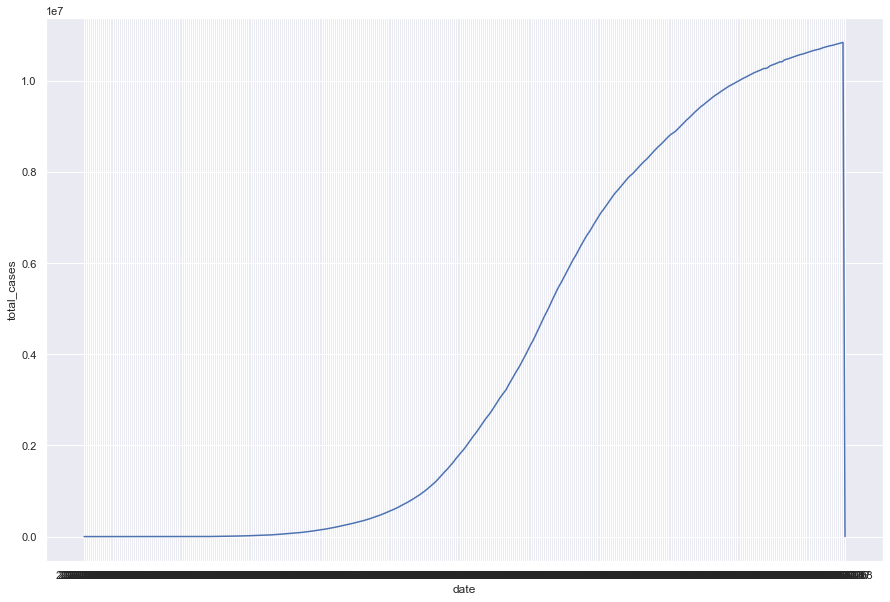

In [12]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india)
plt.show()

In [13]:
india_last_5_days=india.tail()


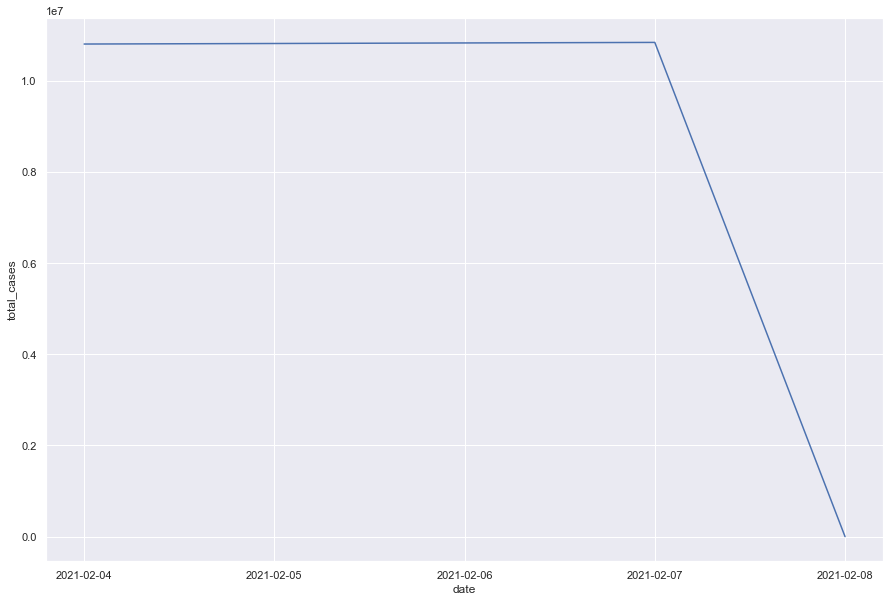

In [14]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

In [15]:
brazil=covid_data[covid_data["location"]=="Brazil"]

In [16]:
brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
8657,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.0,0.0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.759
8658,BRA,South America,Brazil,2020-02-27,1.0,0.0,0.0,0.0,0.0,0.0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.759
8659,BRA,South America,Brazil,2020-02-28,1.0,0.0,0.0,0.0,0.0,0.0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.759
8660,BRA,South America,Brazil,2020-02-29,2.0,1.0,0.0,0.0,0.0,0.0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.759
8661,BRA,South America,Brazil,2020-03-01,2.0,0.0,0.0,0.0,0.0,0.0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.759


In [17]:
brazil_last_5_days=brazil.tail()

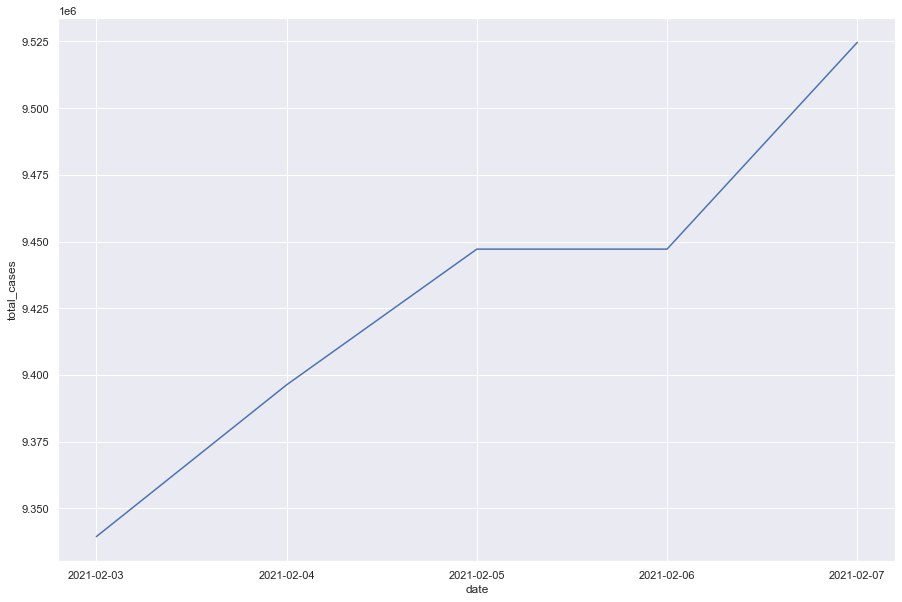

In [18]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_5_days)
plt.show()

In [19]:
last_day_cases=covid_data[(covid_data["date"]=="2020-12-18")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,...,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.498
659,0,0,Africa,2020-12-18,2469647.0,19320.0,17818.286,58310.0,496.0,378.286,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
1008,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,...,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.785
1357,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754
1700,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,...,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000,83.73,0.858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65974,VNM,Asia,Vietnam,2020-12-18,1410.0,3.0,2.714,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694
66357,OWID_WRL,0,World,2020-12-18,75760359.0,719253.0,645068.429,1675522.0,12619.0,11438.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000
66661,YEM,Asia,Yemen,2020-12-18,2087.0,0.0,0.714,606.0,0.0,0.000,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452
66988,ZMB,Africa,Zambia,2020-12-18,18575.0,71.0,59.143,373.0,4.0,1.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588


In [20]:
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
66357,OWID_WRL,0,World,2020-12-18,75760359.0,719253.0,645068.429,1675522.0,12619.0,11438.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000
20882,0,0,Europe,2020-12-18,21074547.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
44528,0,0,North America,2020-12-18,20222106.0,276330.0,243096.857,463383.0,3763.0,3395.143,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
3488,0,0,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
64170,USA,North America,United States,2020-12-18,17545869.0,251033.0,220290.286,313898.0,2797.0,2576.714,...,54225.446,1.2,151.089,10.79,19.100,24.600,0.000,2.770,78.86,0.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65261,VAT,Europe,Vatican,2020-12-18,27.0,0.0,0.000,0.0,0.0,0.000,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,75.12,0.000
55062,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,0.0,0.0,0.000,...,2205.923,25.1,459.780,18.68,0.000,0.000,35.890,1.400,73.00,0.546
38306,MHL,Oceania,Marshall Islands,2020-12-18,4.0,0.0,0.000,0.0,0.0,0.000,...,3819.202,0.0,557.793,30.53,0.000,0.000,82.502,2.700,73.70,0.708
51512,WSM,Oceania,Samoa,2020-12-18,2.0,0.0,0.000,0.0,0.0,0.000,...,6021.557,0.0,348.977,9.21,16.700,38.100,0.000,0.000,73.32,0.713


In [21]:
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
20882,0,0,Europe,2020-12-18,21074547.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000
44528,0,0,North America,2020-12-18,20222106.0,276330.0,243096.857,463383.0,3763.0,3395.143,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000
3488,0,0,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000
64170,USA,North America,United States,2020-12-18,17545869.0,251033.0,220290.286,313898.0,2797.0,2576.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
21264,0,0,European Union,2020-12-18,13969915.0,157984.0,133727.286,331199.0,4093.0,3516.000,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000


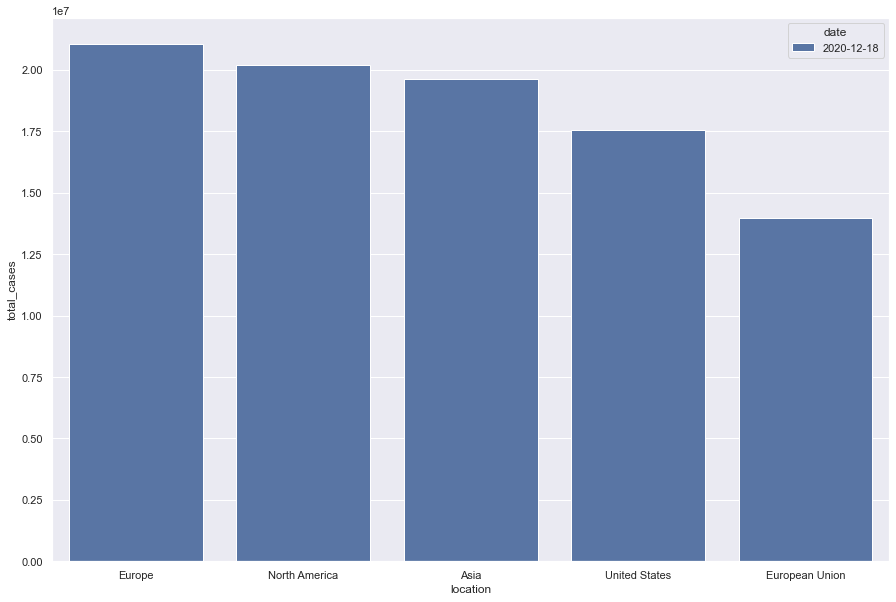

In [22]:
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date")
plt.show()

In [35]:
df = covid_data.drop_duplicates()

In [36]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67360,ZWE,Africa,Zimbabwe,2021-02-03,33964.0,150.0,237.143,1269.0,15.0,21.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
67361,ZWE,Africa,Zimbabwe,2021-02-04,34171.0,207.0,217.857,1288.0,19.0,18.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
67362,ZWE,Africa,Zimbabwe,2021-02-05,34331.0,160.0,197.000,1303.0,15.0,17.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
67363,ZWE,Africa,Zimbabwe,2021-02-06,34487.0,156.0,173.429,1316.0,13.0,17.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [39]:
df1= pd.qcut(df['life_expectancy'], q=20)

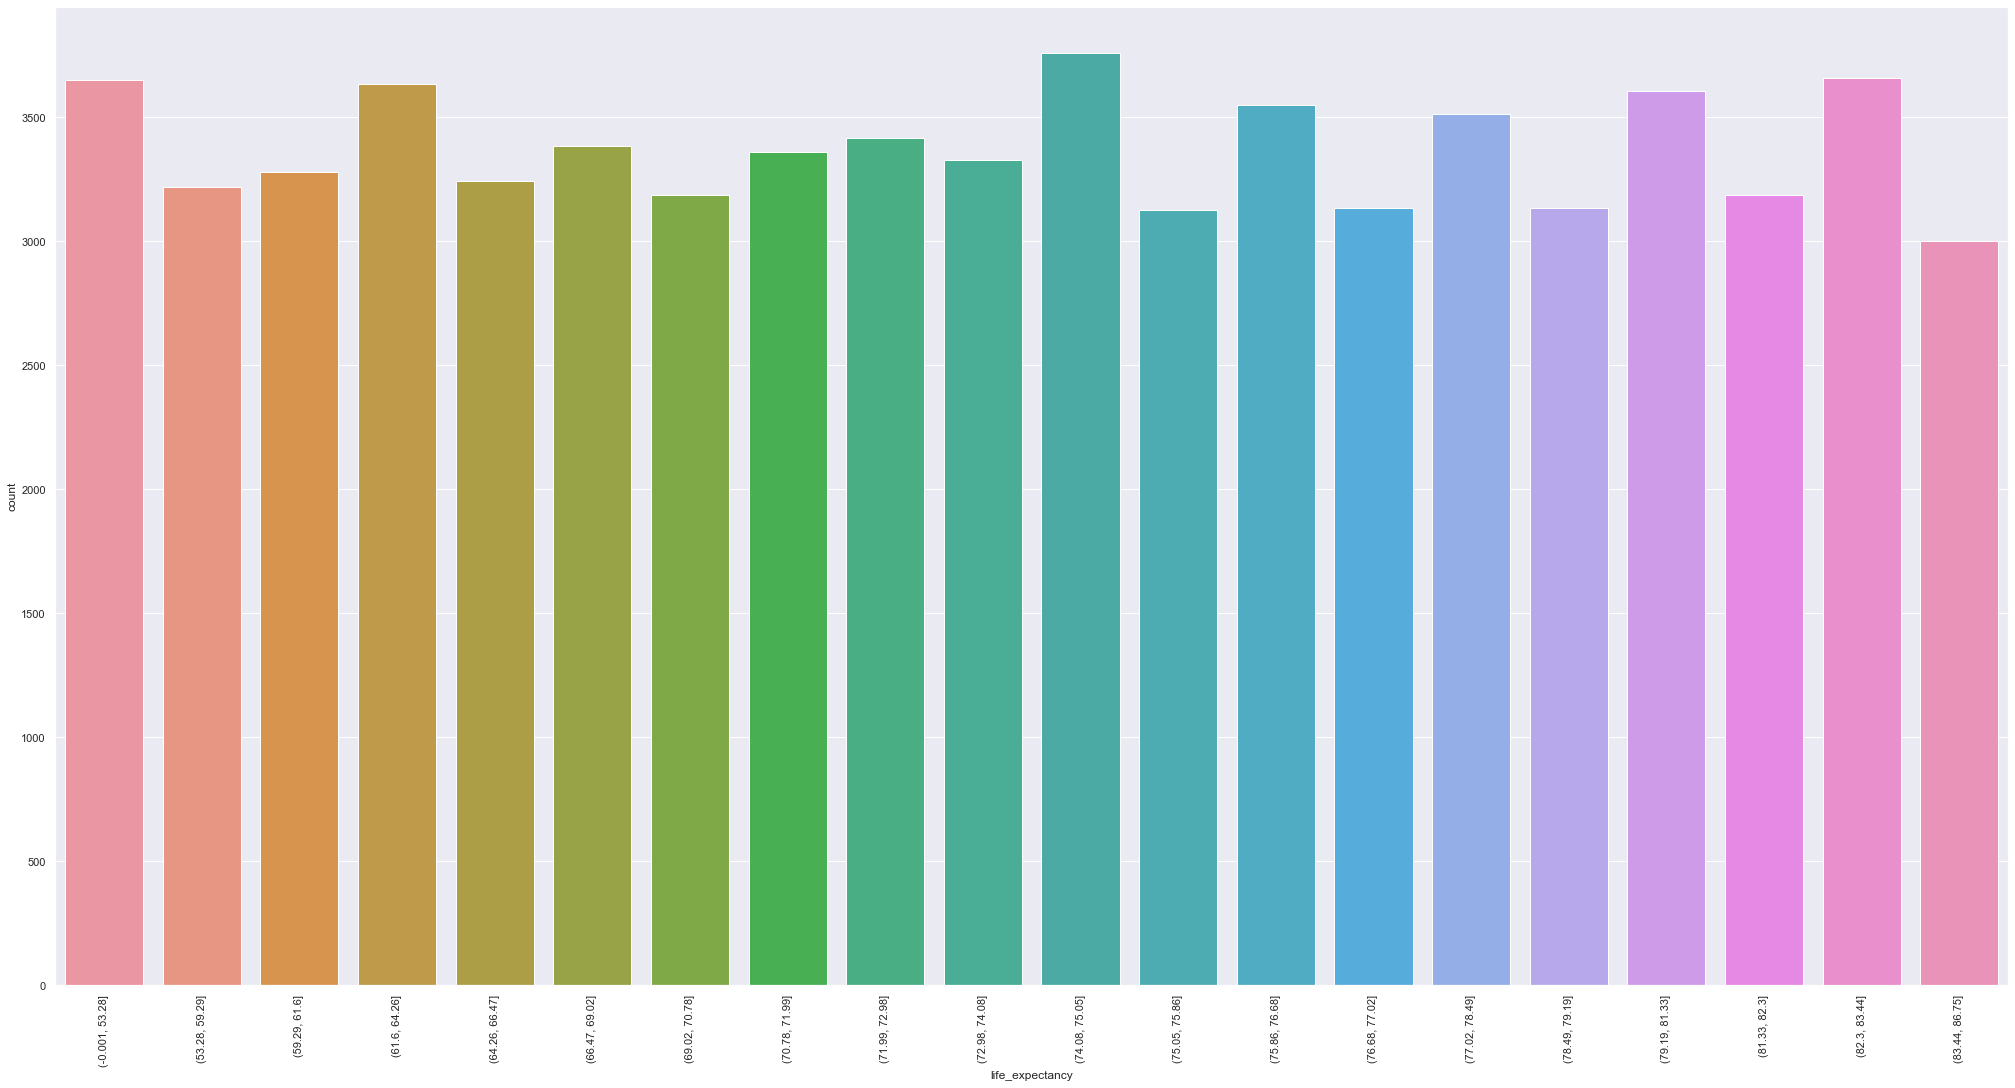

In [40]:
plt.figure(figsize=(35,18))
sns.countplot(x=df1)
plt.xticks(rotation=90)
plt.show()

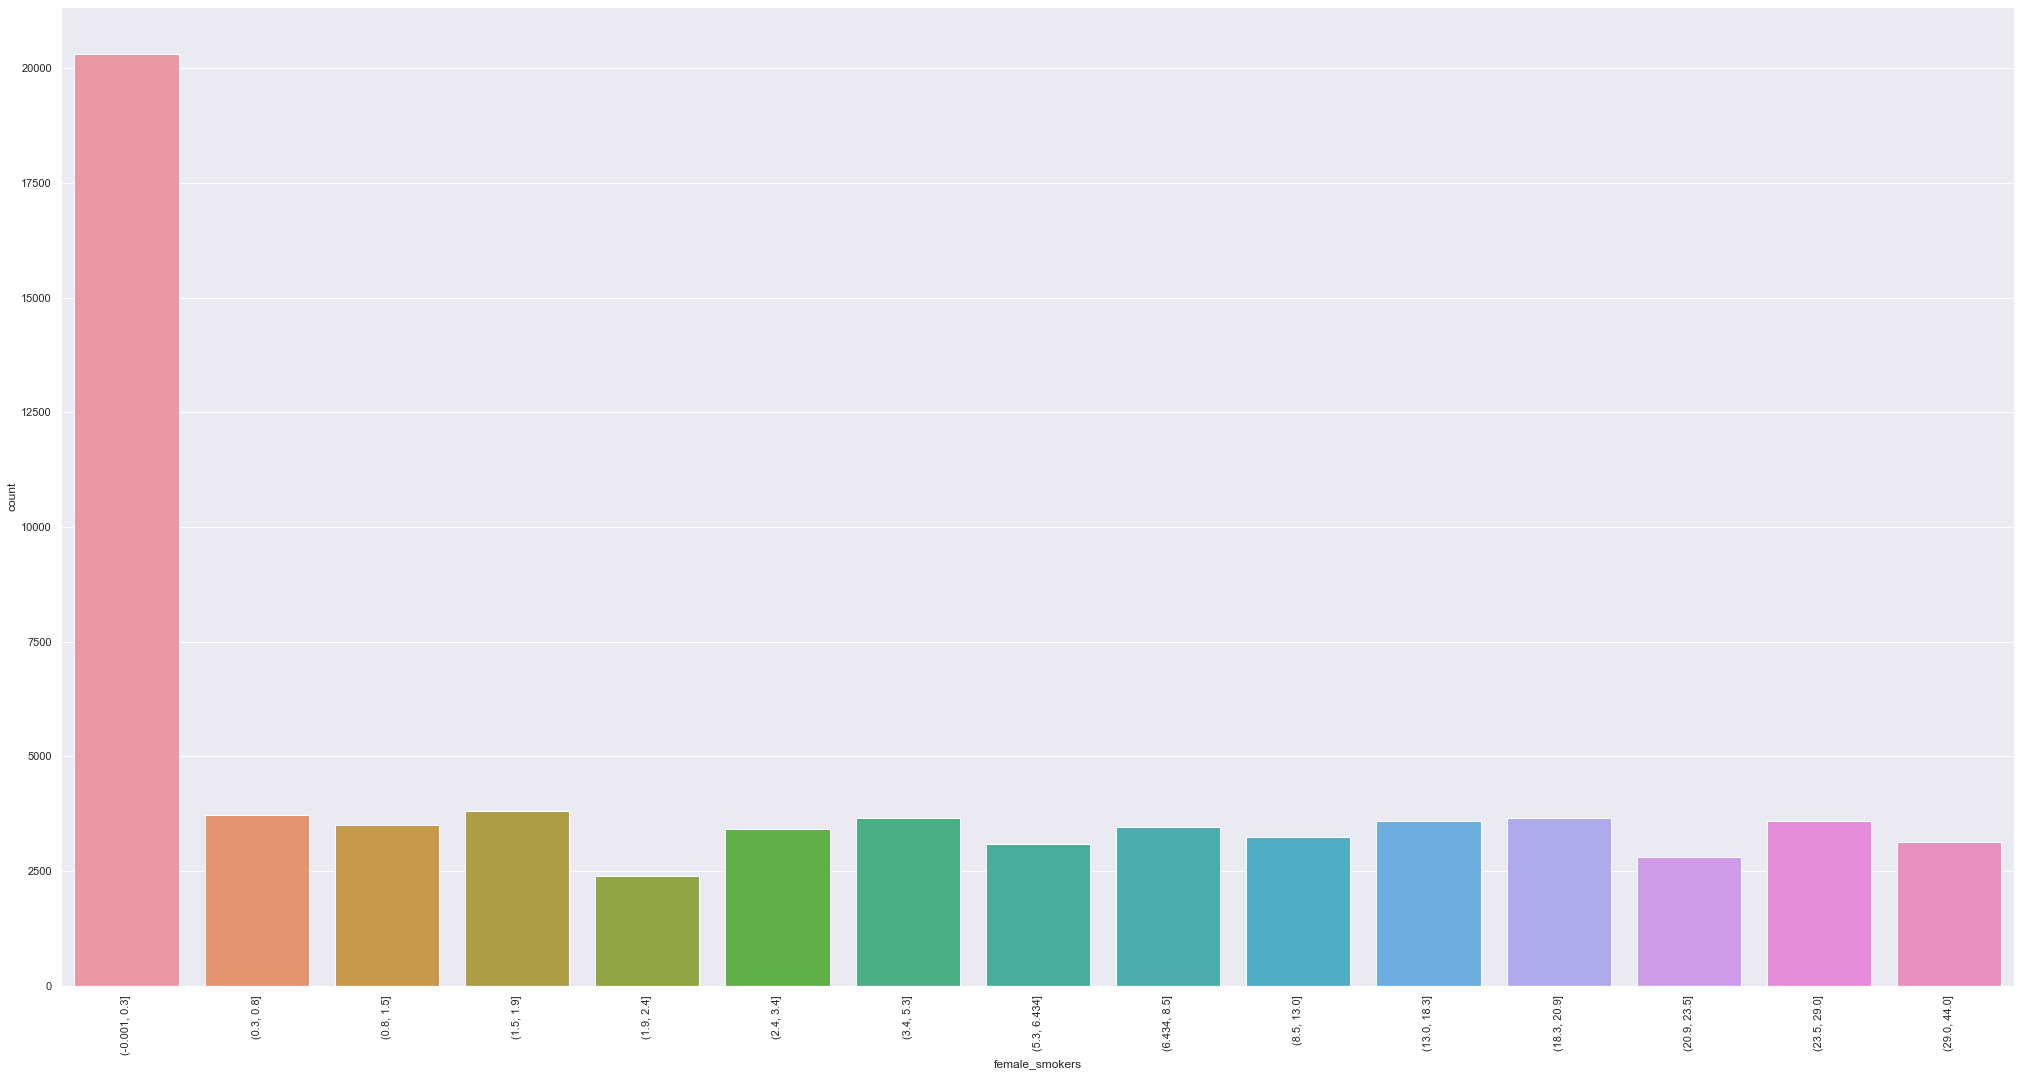

In [45]:
df2= pd.qcut(df['female_smokers'], q=20, duplicates = 'drop')
plt.figure(figsize=(35,18))
sns.countplot(x=df2)
plt.xticks(rotation=90)
plt.show()

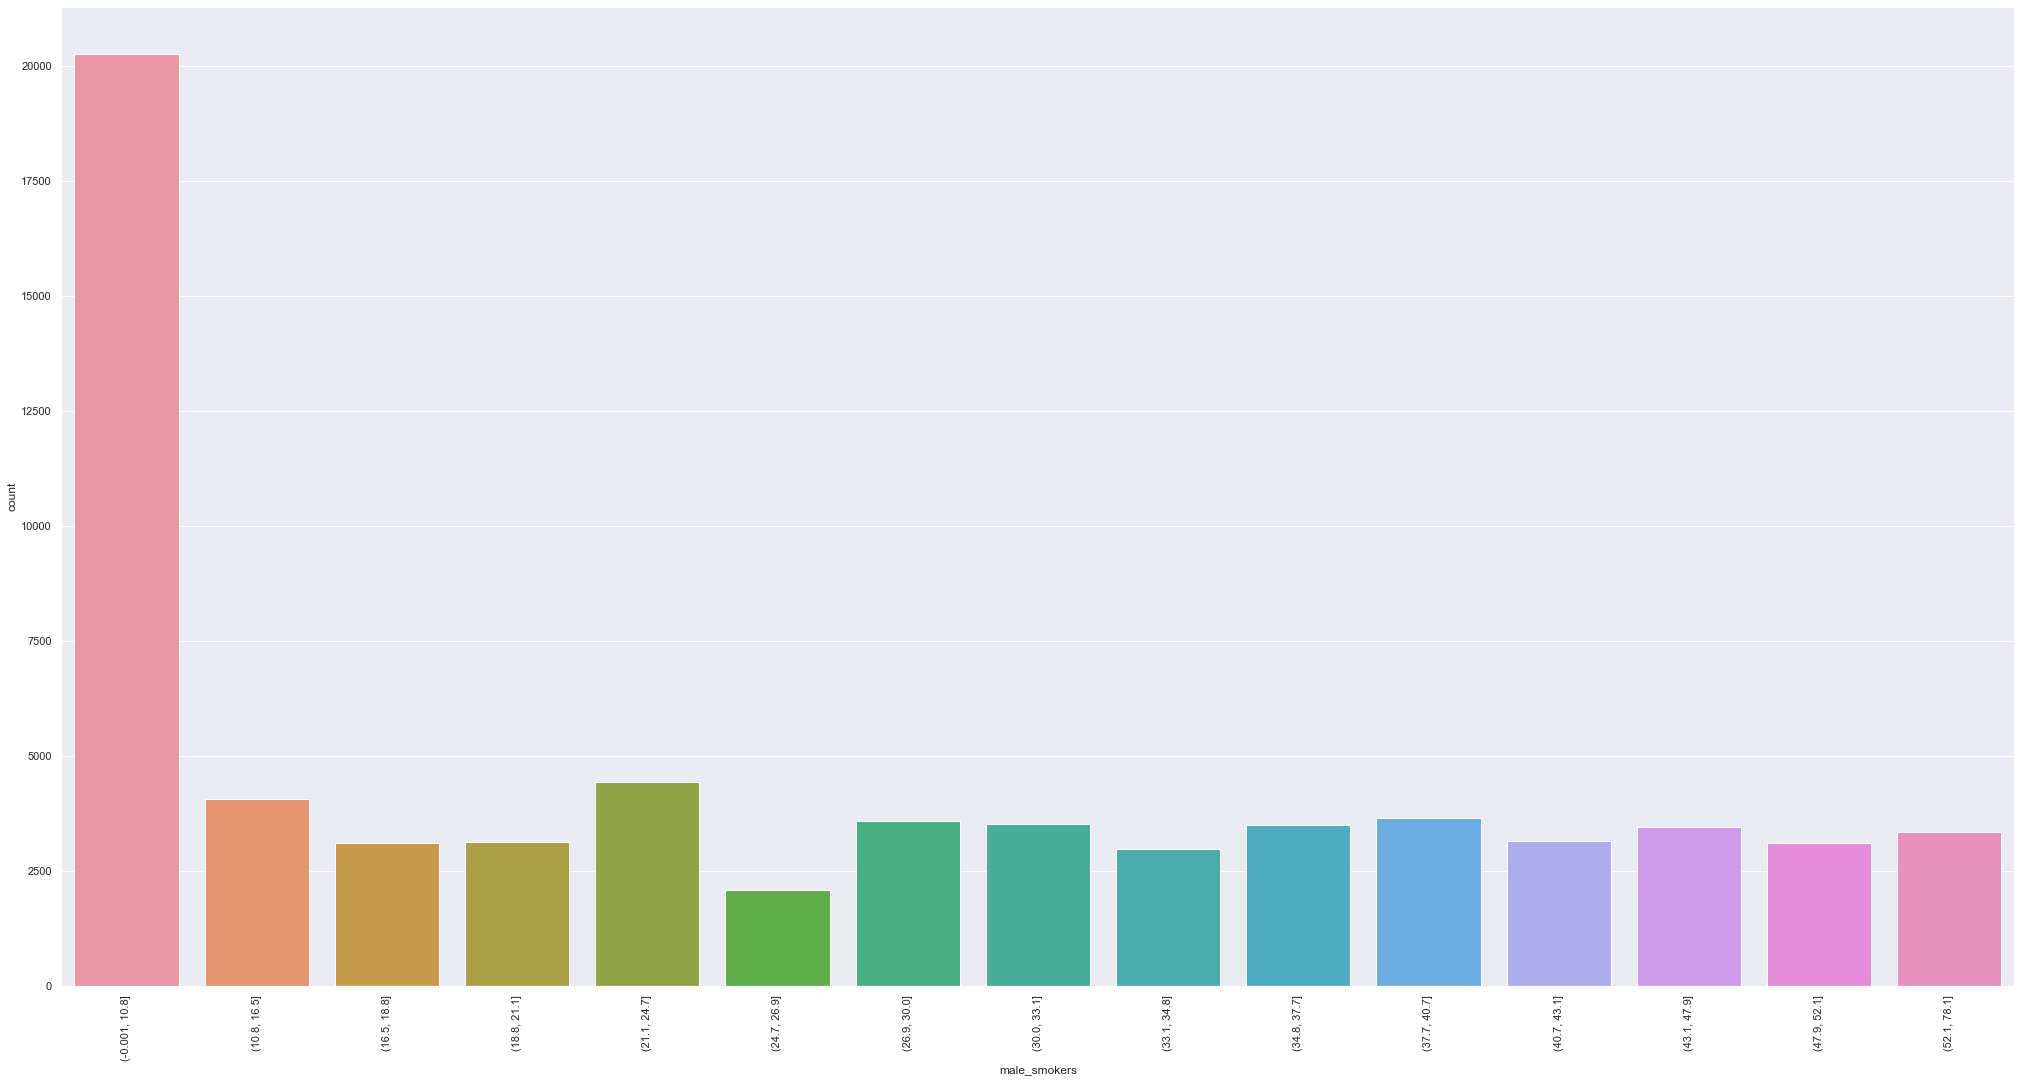

In [46]:
df3= pd.qcut(df['male_smokers'], q=20, duplicates = 'drop')
plt.figure(figsize=(35,18))
sns.countplot(x=df3)
plt.xticks(rotation=90)
plt.show()

In [47]:
US=covid_data[covid_data["location"]=="United States"]

In [48]:
US.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
63839,USA,North America,United States,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
63840,USA,North America,United States,2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
63841,USA,North America,United States,2020-01-24,2.0,1.0,0.0,0.0,0.0,0.0,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
63842,USA,North America,United States,2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
63843,USA,North America,United States,2020-01-26,5.0,3.0,0.0,0.0,0.0,0.0,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924


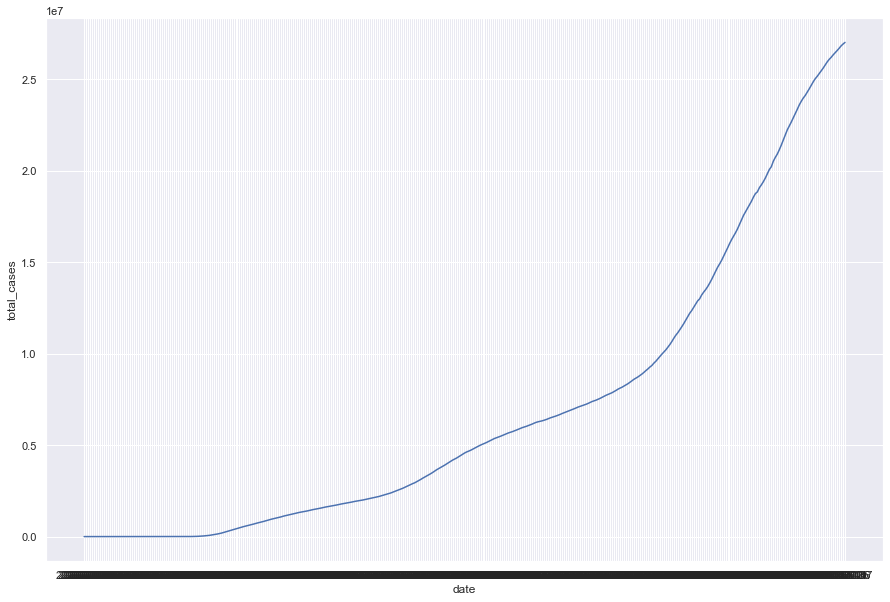

In [50]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=US)
plt.show()

In [51]:
last_day_cases=covid_data[(covid_data["date"]=="2020-12-18")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,...,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.498
659,0,0,Africa,2020-12-18,2469647.0,19320.0,17818.286,58310.0,496.0,378.286,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
1008,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,...,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.785
1357,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754
1700,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,...,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000,83.73,0.858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65974,VNM,Asia,Vietnam,2020-12-18,1410.0,3.0,2.714,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694
66357,OWID_WRL,0,World,2020-12-18,75760359.0,719253.0,645068.429,1675522.0,12619.0,11438.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000
66661,YEM,Asia,Yemen,2020-12-18,2087.0,0.0,0.714,606.0,0.0,0.000,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452
66988,ZMB,Africa,Zambia,2020-12-18,18575.0,71.0,59.143,373.0,4.0,1.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588


In [52]:
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
66357,OWID_WRL,0,World,2020-12-18,75760359.0,719253.0,645068.429,1675522.0,12619.0,11438.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000
20882,0,0,Europe,2020-12-18,21074547.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
44528,0,0,North America,2020-12-18,20222106.0,276330.0,243096.857,463383.0,3763.0,3395.143,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
3488,0,0,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
64170,USA,North America,United States,2020-12-18,17545869.0,251033.0,220290.286,313898.0,2797.0,2576.714,...,54225.446,1.2,151.089,10.79,19.100,24.600,0.000,2.770,78.86,0.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65261,VAT,Europe,Vatican,2020-12-18,27.0,0.0,0.000,0.0,0.0,0.000,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,75.12,0.000
55062,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,0.0,0.0,0.000,...,2205.923,25.1,459.780,18.68,0.000,0.000,35.890,1.400,73.00,0.546
38306,MHL,Oceania,Marshall Islands,2020-12-18,4.0,0.0,0.000,0.0,0.0,0.000,...,3819.202,0.0,557.793,30.53,0.000,0.000,82.502,2.700,73.70,0.708
51512,WSM,Oceania,Samoa,2020-12-18,2.0,0.0,0.000,0.0,0.0,0.000,...,6021.557,0.0,348.977,9.21,16.700,38.100,0.000,0.000,73.32,0.713


In [53]:
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
20882,0,0,Europe,2020-12-18,21074547.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000
44528,0,0,North America,2020-12-18,20222106.0,276330.0,243096.857,463383.0,3763.0,3395.143,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000
3488,0,0,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000
64170,USA,North America,United States,2020-12-18,17545869.0,251033.0,220290.286,313898.0,2797.0,2576.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
21264,0,0,European Union,2020-12-18,13969915.0,157984.0,133727.286,331199.0,4093.0,3516.000,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000


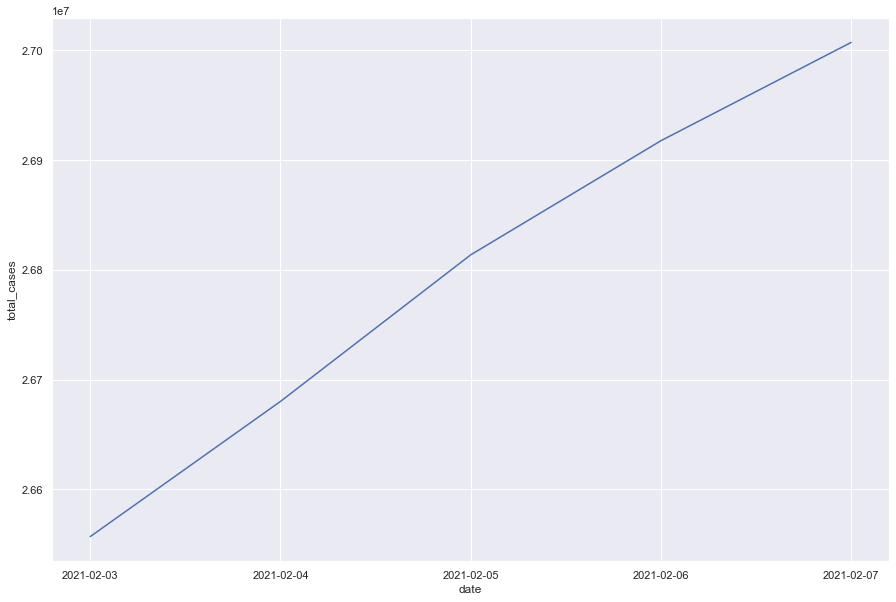

In [55]:
US_last_5_days=US.tail()
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=US_last_5_days)
plt.show()